In [143]:
look_back = 12
train_size = 90

In [144]:
import pandas as pd

df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [145]:
print(df.shape)
passengers = list(df['#Passengers'])
passengers[:10]

(144, 2)


[112, 118, 132, 129, 121, 135, 148, 148, 136, 119]

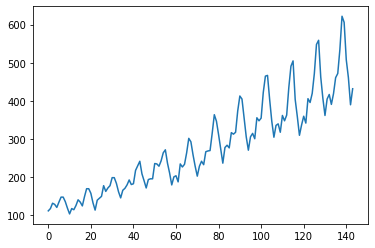

In [146]:
import matplotlib.pyplot as plt

plt.plot(passengers)
plt.show()

In [147]:
# raw_month = list(df['Month'])

# train_x = []
# test_x = []

# for i in range(len(raw_month)):
#     year = int( raw_month[i].split('-')[0] )
#     month = int( raw_month[i].split('-')[1] )
#     if i<train_size:
#         train_x.append( [year, month] )
#     else:
#         test_x.append( [year, month] )

# print(len(train_x), train_x[:15], sep=" --> ")
# print(len(test_x), test_x[:15], sep=" --> ")

In [148]:
train_x, train_y = [], []

for i in range(look_back, len(passengers)):
    # print(f"index {i} --> {passengers[i-look_back : i][:-1]} --> {passengers[i-look_back : i][-1]}")

    train_x.append( passengers[i-look_back : i][:-1] )
    train_y.append( passengers[i-look_back : i][-1] )

In [149]:
import numpy as np

X = np.array( train_x[:train_size] )
y = np.array( train_y[:train_size] )

val_X = np.array( train_x[train_size:] )
val_y = np.array( train_y[train_size:] )

In [150]:
# calc_train_x = np.array(train_x)
# calc_train_x = calc_train_x.reshape( 1452 )

# print(min(calc_train_x))
# print(max(calc_train_x))

In [151]:
print(f"training X shape --> {X.shape}")
print(f"training y shape --> {y.shape}\n")
print(f"validation X shape --> {val_X.shape}")
print(f"validation y shape --> {val_y.shape}")

training X shape --> (90, 11)
training y shape --> (90,)

validation X shape --> (42, 11)
validation y shape --> (42,)


In [152]:
# X_ = np.array(X)
# print(X_.shape)

# X_ = X_.reshape( X.shape[0], X.shape[1], 1 )
# print(X_.shape)

In [157]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.models.Sequential([
    layers.LSTM(128, input_shape=[ X.shape[1], 1 ]),
    # layers.Dense(128, input_shape=[ X.shape[1] ], activation='relu'),
    layers.Dense(1)
])

model.compile(
    loss='mae',
    optimizer='adam',
)

In [158]:
history = model.fit(
    X/622, y/622,
    epochs=250,
    validation_data=(val_X/622, val_y/622)
)

Epoch 1/250
3/3 [==============================] - 5s 505ms/step - loss: 0.2850 - val_loss: 0.3530
Epoch 2/250
3/3 [==============================] - 0s 43ms/step - loss: 0.1188 - val_loss: 0.1027
Epoch 3/250
3/3 [==============================] - 0s 48ms/step - loss: 0.0899 - val_loss: 0.1454
Epoch 4/250
3/3 [==============================] - 0s 105ms/step - loss: 0.0887 - val_loss: 0.1039
Epoch 5/250
3/3 [==============================] - 0s 50ms/step - loss: 0.0498 - val_loss: 0.1570
Epoch 6/250
3/3 [==============================] - 0s 48ms/step - loss: 0.0674 - val_loss: 0.1601
Epoch 7/250
3/3 [==============================] - 0s 43ms/step - loss: 0.0597 - val_loss: 0.1184
Epoch 8/250
3/3 [==============================] - 0s 46ms/step - loss: 0.0473 - val_loss: 0.1037
Epoch 9/250
3/3 [==============================] - 0s 51ms/step - loss: 0.0497 - val_loss: 0.1039
Epoch 10/250
3/3 [==============================] - 0s 51ms/step - loss: 0.0503 - val_loss: 0.1040
Epoch 11/250
3/3 

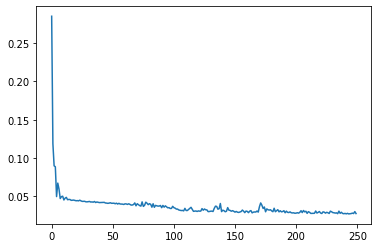

In [159]:
import matplotlib.pyplot as plt

plt.plot( history.history['loss'] )
plt.show()

42


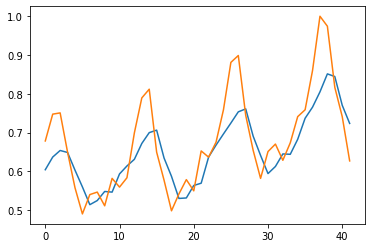

In [160]:
pred = model.predict(val_X/622)

print(len(pred))

plt.plot(pred),
plt.plot(val_y/622)
plt.show()